# SPamCo with Ensembles

In [36]:
#Math packages
import numpy as np

#Data packages
import pandas as pd
from pandas_profiling import ProfileReport

#Spamco
from spamco import SPamCo, Validation

#Data packages
from sklearn.datasets import make_moons, make_classification, make_circles, make_blobs, make_gaussian_quantiles
from sklearn.datasets import load_breast_cancer, load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

#Classifier packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

#Validation packages
from sklearn.metrics import accuracy_score

#Visualization packages
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from matplotlib.ticker import MaxNLocator
%matplotlib inline

import baycomp

#General utility packages
from itertools import cycle, islice
import warnings

warnings.filterwarnings("ignore")
matplotlib.rcParams.update({'font.size': 20})

# Diabetes Health Indicators Dataset

In [2]:
df = pd.read_csv('Data/diabetes.csv')

In [3]:
y =df.values[:,0]
X =df.drop(['Diabetes_012','AnyHealthcare'], axis = 1).values

In [4]:
int(X.shape[0]/20)

12684

In [10]:
np.random.seed(1)
seeds = np.random.randint(low = 1, high = 10000, size = (10, 10))

In [11]:
for seed in seeds:
    print(seed)

[ 236 5193  906 7814 2896 5057  145 4226 7752 3463]
[9395 5397 5375 2963 2517 8445 3563 4765 8094 6543]
[ 563 8152 3050  754 9720 1889 1111 6286 6122 1032]
[4416 2878 3607 9530 2562 8921 6772  432 4075  543]
[9288 1479 1338 7109 8690 1613 3099 1845 9553 2670]
[  16 2245 7907 1307 9833 1047 3048 1151 9496 3429]
[ 156 4410  649 9505 7587 1680 7256 7962 4040  244]
[1373 1215 7471 5025 5849 5272 4792 9538 9988 2945]
[5374  462 1799 4566 1479 4060  716 6408 6222 2761]
[5196 7501 1068 7711 9765 9992 3886 6714 7677   97]


## AdaBoost

In [17]:
adaboost_base_metrics = []
adaboost_base_clfs = []

model =  {
    'classifier':AdaBoostClassifier(),
    'num_view':1,
    'gamma':0.3,
    'steps':10,
    'regularizer':'hard'
}

for seed in seeds:
    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.01,
        random_seed=seed,
        iters=10
    )

    adaboost_base_metrics.append(metrics)
    adaboost_base_clfs.append(clfs)

adaboost_base_score = np.array(adaboost_base_metrics)

Validation Iteration: 0 Accuracy: 0.8419925365289603 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8391674550614948 Labels: 1775
Validation Iteration: 0 Accuracy: 0.838155681698728 Labels: 1775
Validation Iteration: 0 Accuracy: 0.836802270577105 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8374461263534111 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8418874172185431 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8391411752338904 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8391280353200883 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8418348575633344 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8259881215179229 Labels: 1775


In [13]:
adaboost_multi_metrics = []
adaboost_multi_clfs = []
steps = 20
views = 2

model =  {
    'classifier':AdaBoostClassifier(),
    'num_view':views,
    'gamma':0.3,
    'steps':steps,
    'regularizer':'hard',
    'update_add_num': int(X.shape[0]/steps)
}

for seed in seeds:
    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.01,
        random_seed=seed,
        spaco=True,
        iters=5,
        hsplit=True,
        hsplit_size=views
    )

    adaboost_multi_metrics.append(metrics)
    adaboost_multi_clfs.append(clfs)

adaboost_multi_score = np.array(adaboost_multi_metrics)

[ 236 5193  906 7814 2896 5057  145 4226 7752 3463]
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
[9395 5397 5375 2963 2517 8445 3563 4765 8094 6543]
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
[ 563 8152 3050  754 9720 1889 1111 6286 6122 1032]
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
[4416 2878 3607 9530 2562 8921 6772  432 4075  543]
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
[9288 1479 1338 7109 8690 1613 3099 1845 9553 2670]
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
[  16 2245 7907 1307 9833 1047 3048 1151 9496 3429]
Validation Iteration: 0 Accu

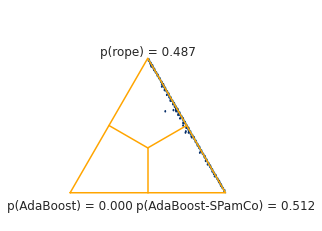

In [42]:
baycomp_ada, bayplot_ada = baycomp.two_on_multiple(
    adaboost_base_score, 
    adaboost_multi_score, 
    plot=True, 
    rope=0.005, 
    names = ('AdaBoost','AdaBoost-SPamCo'))

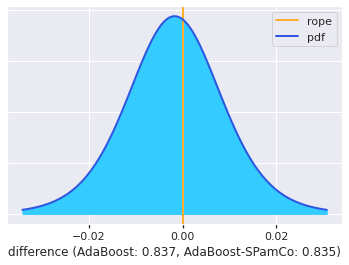

In [43]:
baycomp_ada, bayplot_ada = baycomp.two_on_single(
    np.mean(adaboost_base_score, axis=1), 
    np.mean(adaboost_multi_score, axis=1), 
    plot=True, 
    names = ('AdaBoost','AdaBoost-SPamCo'))

## RandomForrestClassifier

In [50]:
rfc_base_metrics = []
rfc_base_clfs = []

model =  {
    'classifier':RandomForestClassifier(),
    'num_view':1,
    'gamma':0.3,
    'steps':10,
    'regularizer':'hard'
}

for seed in seeds:
    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.01,
        random_seed=seed,
        iters=10
    )

    rfc_base_metrics.append(metrics)
    rfc_base_clfs.append(clfs)

rfc_base_score = np.array(rfc_base_metrics)

Validation Iteration: 0 Accuracy: 0.8441737622201199 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8444891201513718 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8432014085987596 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8447124986860086 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8445942394617891 Labels: 1775
Validation Iteration: 0 Accuracy: 0.841966256701356 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8443051613581415 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8429517502365185 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8420188163565647 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8434116472195943 Labels: 1775


In [47]:
rfc_multi_metrics = []
rfc_multi_clfs = []
steps = 20
views = 2

model =  {
    'classifier':RandomForestClassifier(),
    'num_view':views,
    'gamma':0.3,
    'steps':steps,
    'regularizer':'hard',
    'update_add_num': int(X.shape[0]/steps)
}

for seed in seeds:
    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.01,
        random_seed=seed,
        spaco=True,
        iters=5,
        hsplit=True,
        hsplit_size=views
    )

    rfc_multi_metrics.append(metrics)
    rfc_multi_clfs.append(clfs)

rfc_multi_score = np.array(rfc_multi_metrics)

Validation Iteration: 0 Accuracy: 0.8409544833385894 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8402712078208767 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8407836644591612 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8409544833385894 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8406391254073373 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8413881004940608 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8412172816146326 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8413092610112478 Labels: 1775
Validation

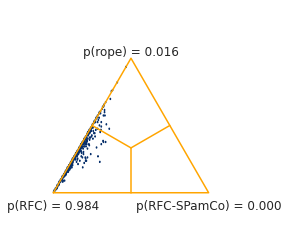

In [56]:
baycomp_rfc, bayplot_rfc = baycomp.two_on_multiple(
    rfc_base_score, 
    rfc_multi_score, 
    plot=True, 
    rope=0.001, 
    names = ('RFC','RFC-SPamCo'))

## XGBoost

In [58]:
xgboost_base_metrics = []
xgboost_base_clfs = []

model =  {
    'classifier':xgb.XGBClassifier(silent=True, verbosity=0),
    'num_view':1,
    'gamma':0.3,
    'steps':10,
    'regularizer':'hard'
}

for seed in seeds:
    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.01,
        random_seed=seed,
        iters=10
    )

    xgboost_base_metrics.append(metrics)
    xgboost_base_clfs.append(clfs)

xgboost_base_score = np.array(xgboost_base_metrics)

Validation Iteration: 0 Accuracy: 0.8284847051403342 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8292993797960685 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8228871018606118 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8275517712603805 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8303111531588353 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8228608220330075 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8282613266056975 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8262246399663619 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8237937559129612 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8217045096184169 Labels: 1775


In [60]:
xgboost_multi_metrics = []
xgboost_multi_clfs = []
steps = 20
views = 2

model =  {
    'classifier':xgb.XGBClassifier(silent=True, verbosity=0),
    'num_view':views,
    'gamma':0.3,
    'steps':steps,
    'regularizer':'hard',
    'update_add_num': int(X.shape[0]/steps)
}

for seed in seeds:
    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.01,
        random_seed=seed,
        spaco=True,
        iters=5,
        hsplit=True,
        hsplit_size=views
    )

    xgboost_multi_metrics.append(metrics)
    xgboost_multi_clfs.append(clfs)

xgboost_multi_score = np.array(xgboost_multi_metrics)

Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8425575528224535 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8423998738568275 Labels: 1775
Validation

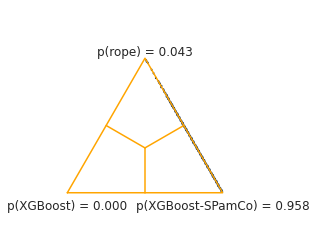

In [80]:
baycomp_xgboost, bayplot_xgboost = baycomp.two_on_multiple(
    xgboost_base_score, 
    xgboost_multi_score, 
    plot=True, 
    rope=0.015, 
    names = ('XGBoost','XGBoost-SPamCo'))

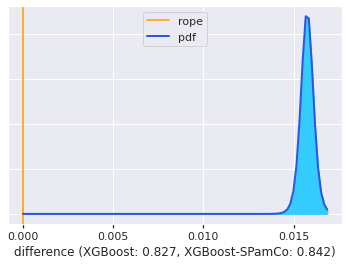

In [75]:
baycomp_xgboost, bayplot_xgboost = baycomp.two_on_single(
    np.mean(xgboost_base_score, axis=1), 
    np.mean(xgboost_multi_score, axis=1), 
    plot=True, 
    names = ('XGBoost','XGBoost-SPamCo'))

In [76]:
baycomp_xgboost

(2.744915406083237e-12, 0.9999999999972551)

# Testing

In [7]:
adaboost_multi_metrics = []
adaboost_multi_clfs = []
steps = 20
views = 2

model =  {
    'classifier':AdaBoostClassifier(),
    'num_view':views,
    'gamma':0.3,
    'steps':steps,
    'regularizer':'hard',
    'update_add_num': int(X.shape[0]/steps)
}


print(seed)
clfs, metrics = Validation.validation(
    model_params=model,
    train_data_x=X,
    train_data_y=y,
    percent_labeled=0.01,
    random_seed=seed,
    spaco=True,
    iters=1,
    single_view=True
)

adaboost_multi_metrics.append(metrics)
adaboost_multi_clfs.append(clfs)

adaboost1_multi_score = np.array(adaboost_multi_metrics)

[5196 7501 1068 7711 9765 9992 3886 6714 7677   97]
Validation Iteration: 0 Accuracy: 0.8044386628823715 Labels: 1775
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 1775


In [7]:
mix_multi_metrics = []
mix_multi_clfs = []
steps = 20
views = 3

model =  {
    'classifier':[AdaBoostClassifier(),RandomForestClassifier(),xgb.XGBClassifier(silent=True, verbosity=0)],
    'num_view':views,
    'gamma':0.3,
    'steps':steps,
    'regularizer':'hard',
    'update_add_num': int(X.shape[0]/steps),
    'multiple_classifiers': True
}


print(seed)
clfs, metrics = Validation.validation(
    model_params=model,
    train_data_x=X,
    train_data_y=y,
    percent_labeled=0.01,
    random_seed=seed,
    spaco=True,
    iters=2,
    multiple_classifiers=True
)

mix_multi_metrics.append(metrics)
mix_multi_clfs.append(clfs)

mix_multi_score = np.array(mix_multi_metrics)

[5196 7501 1068 7711 9765 9992 3886 6714 7677   97]
Validation Iteration: 0 Accuracy: 0.7997477136549984 Labels: 1775


## Looking up Data


In [220]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
X, y = fetch_openml(data_id = 1220, return_X_y=True)

In [205]:
X['V2'] = LE.fit_transform(X['V2'])

In [221]:
X = X.values

In [222]:
y = y.values

In [223]:
y = LE.fit_transform(y)

In [216]:
X.shape

(1600, 64)

In [217]:
y

array([ 0,  0,  0, ..., 23, 23, 23])

In [224]:
multi_metrics = []
multi_clfs = []
steps = 20
views = 2

model =  {
    'classifier':xgb.XGBClassifier(silent=True, verbosity=0),
    'num_view':views,
    'gamma':0.3,
    'steps':10,
    'regularizer':'hard',
    'update_add_num': int(X.shape[0]/steps)
}


clfs, metrics = Validation.validation(
    model_params=model,
    train_data_x=X,
    train_data_y=y,
    percent_labeled=0.1,
    random_seed=seed,
    spaco=True,
    iters=5,
    hsplit=True,
    hsplit_size=views
)

multi_metrics.append(metrics)
multi_clfs.append(clfs)

multi_score = np.array(multi_metrics)

ValueError: Feature shape mismatch, expected: 4, got 5